In [2]:
import numpy as np

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.read_csv(r'C:\Users\namit\Desktop\Projet-DA\LFB Incident data from 2009 - 2017.csv', low_memory=False)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.00,01-Jan-09,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.00,01-Jan-09,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.00,01-Jan-09,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.00,01-Jan-09,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.00,01-Jan-09,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988274,175190-31122017,31-Dec-17,2017,23:26:06,23,Fire,Primary Fire,NaN,Dwelling,House - single occupancy,...,120.0,Heston,503.0,Feltham,2.0,2.0,2,60,328,1.0
988275,175193-31122017,31-Dec-17,2017,23:34:55,23,False Alarm,False alarm - Good intent,NaN,Non Residential,Other building/use not known,...,688.0,Hendon,761.0,West Hampstead,2.0,2.0,2,76,415,2.0
988276,175194-31122017,31-Dec-17,2017,23:35:44,23,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,226.0,Paddington,244.0,Paddington,2.0,3.0,3,60,328,1.0
988277,175195-31122017,31-Dec-17,2017,23:36:34,23,False Alarm,AFA,NaN,Non Residential,Purpose built office,...,174.0,Tottenham,NaN,NaN,1.0,1.0,1,60,328,1.0


In [5]:
dfi1=pd.read_csv(r'C:\Users\namit\Desktop\Projet-DA\LFB Incident data from 2009 - 2017.csv', low_memory=False)

In [6]:
dfi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988279 entries, 0 to 988278
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          988279 non-null  object 
 1   DateOfCall                              988279 non-null  object 
 2   CalYear                                 988279 non-null  int64  
 3   TimeOfCall                              988279 non-null  object 
 4   HourOfCall                              988279 non-null  int64  
 5   IncidentGroup                           988279 non-null  object 
 6   StopCodeDescription                     988279 non-null  object 
 7   SpecialServiceType                      299101 non-null  object 
 8   PropertyCategory                        988279 non-null  object 
 9   PropertyType                            988279 non-null  object 
 10  AddressQualifier                        9882

In [7]:
dfi1.select_dtypes(include=['int64']).columns

Index(['CalYear', 'HourOfCall', 'Easting_rounded', 'Northing_rounded',
       'PumpCount', 'PumpMinutesRounded', 'Notional Cost (£)'],
      dtype='object')

In [8]:
dfi1.select_dtypes(include=['float64']).columns

Index(['UPRN', 'USRN', 'Easting_m', 'Northing_m', 'Latitude', 'Longitude',
       'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'NumCalls'],
      dtype='object')

In [9]:
dfi1.describe

<bound method NDFrame.describe of          IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
0          235138081.00  01-Jan-09     2009   00:00:37           0   
1               1091.00  01-Jan-09     2009   00:00:46           0   
2               2091.00  01-Jan-09     2009   00:03:00           0   
3               3091.00  01-Jan-09     2009   00:04:27           0   
4               5091.00  01-Jan-09     2009   00:05:39           0   
...                 ...        ...      ...        ...         ...   
988274  175190-31122017  31-Dec-17     2017   23:26:06          23   
988275  175193-31122017  31-Dec-17     2017   23:34:55          23   
988276  175194-31122017  31-Dec-17     2017   23:35:44          23   
988277  175195-31122017  31-Dec-17     2017   23:36:34          23   
988278  175197-31122017  31-Dec-17     2017   23:58:09          23   

          IncidentGroup        StopCodeDescription     SpecialServiceType  \
0       Special Service            Special Servi

In [10]:
def null_percentage(column):
    total = len(column)
    nulls = column.isnull().sum()
    percentage = (nulls / total) * 100
    return percentage

In [11]:
for column in dfi1.columns:
    print(f"Percentage of null values in {column}: {null_percentage(dfi1[column]):.2f}%")

Percentage of null values in IncidentNumber: 0.00%
Percentage of null values in DateOfCall: 0.00%
Percentage of null values in CalYear: 0.00%
Percentage of null values in TimeOfCall: 0.00%
Percentage of null values in HourOfCall: 0.00%
Percentage of null values in IncidentGroup: 0.00%
Percentage of null values in StopCodeDescription: 0.00%
Percentage of null values in SpecialServiceType: 69.74%
Percentage of null values in PropertyCategory: 0.00%
Percentage of null values in PropertyType: 0.00%
Percentage of null values in AddressQualifier: 0.00%
Percentage of null values in Postcode_full: 45.69%
Percentage of null values in Postcode_district: 0.00%
Percentage of null values in UPRN: 14.30%
Percentage of null values in USRN: 16.48%
Percentage of null values in IncGeo_BoroughCode: 0.00%
Percentage of null values in IncGeo_BoroughName: 0.00%
Percentage of null values in ProperCase: 0.00%
Percentage of null values in IncGeo_WardCode: 0.00%
Percentage of null values in IncGeo_WardName: 0.0

In [12]:
dfi1.describe(include='int64')

,CalYear,HourOfCall,Easting_rounded,Northing_rounded,PumpCount,PumpMinutesRounded,Notional Cost (£)
count,988279.00000,988279.000000,988279.000000,988279.000000,988279.000000,988279.000000,9.882790e+05
mean,2012.76622,13.536951,530686.961931,180520.003714,1.587745,76.040382,3.581158e+02
std,2.63804,6.212017,9715.709862,7302.075183,1.660304,707.158906,3.221685e+03
min,2009.00000,0.000000,503550.000000,156750.000000,1.000000,60.000000,2.550000e+02
25%,2010.00000,9.000000,525350.000000,176250.000000,1.000000,60.000000,2.600000e+02
50%,2013.00000,14.000000,530950.000000,181050.000000,1.000000,60.000000,2.900000e+02
75%,2015.00000,19.000000,536250.000000,185150.000000,2.000000,60.000000,3.260000e+02
max,2017.00000,23.000000,560950.000000,200950.000000,951.000000,525629.000000,2.277726e+06


In [13]:
def unique_values_for_int_columns(dfi1):
    unique_values = {}
    for column in dfi1.select_dtypes(include='int64').columns:
        unique_values[column] = dfi1[column].unique()
    return unique_values

In [14]:
unique_values_for_int_columns(dfi1)

{'CalYear': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64),
 'HourOfCall': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23], dtype=int64),
 'Easting_rounded': array([528650, 530450, 533750, 507750, 531050, 529450, 541050, 514550,
        531950, 529950, 531350, 532850, 513950, 534950, 532750, 532150,
        535450, 526550, 524250, 528850, 530050, 530250, 543750, 530350,
        541650, 533350, 529850, 544150, 537750, 537050, 537350, 543550,
        532350, 525350, 531250, 517550, 535750, 525650, 523850, 527450,
        536650, 530650, 547550, 531650, 523250, 522650, 542450, 544750,
        517450, 539350, 535050, 534750, 526450, 525250, 543950, 540450,
        531450, 525150, 537550, 509050, 518950, 524850, 526850, 532950,
        520450, 534050, 534250, 515750, 533450, 525950, 524350, 544950,
        545750, 528050, 529650, 537950, 527350, 536750, 541450, 546050,
        549450, 541250, 535850, 

In [15]:
def unique_values_for_object_columns(dfi1):
    unique_values = {}
    for column in dfi1.select_dtypes(include='object').columns:
        unique_values[column] = dfi1[column].unique()
    return unique_values

In [16]:
unique_values_for_object_columns(dfi1)

{'IncidentNumber': array(['235138081.00', '1091.00', '2091.00', ..., '175194-31122017',
        '175195-31122017', '175197-31122017'], dtype=object),
 'DateOfCall': array(['01-Jan-09', '02-Jan-09', '03-Jan-09', ..., '29-Dec-17',
        '30-Dec-17', '31-Dec-17'], dtype=object),
 'TimeOfCall': array(['00:00:37', '00:00:46', '00:03:00', ..., '04:20:21', '01:57:19',
        '05:57:30'], dtype=object),
 'IncidentGroup': array(['Special Service', 'Fire', 'False Alarm'], dtype=object),
 'StopCodeDescription': array(['Special Service', 'Secondary Fire', 'AFA', 'Primary Fire',
        'False alarm - Good intent', 'False alarm - Malicious',
        'Chimney Fire', 'Flood call attended - Batch mobilised',
        'Late Call', 'Use of Special Operations Room'], dtype=object),
 'SpecialServiceType': array(['RTC', 'Assist other agencies', nan, 'Flooding',
        'Medical Incident', 'Lift Release', 'No action (not false alarm)',
        'Effecting entry/exit', 'Animal assistance incidents',
       

In [17]:
dfi1.describe(include='object')

,IncidentNumber,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
count,988279,988279,988279,988279,988279,299101,988279,988279,988279,536765,...,988279,988279,988279,988279,988279,988279,988279,988279,896903,346419
unique,988279,3287,86219,3,10,21,9,290,11,99131,...,33,33,33,888,870,867,1,102,114,113
top,235138081.00,23-Jun-16,19:13:59,False Alarm,AFA,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,SW17 0QT,...,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Hammersmith
freq,1,998,34,481890,355922,63505,446458,106999,535542,1395,...,73639,73639,73639,19432,19434,19434,988279,36979,30763,9393


In [18]:
def unique_values_for_float64_columns(dfi1):
    unique_values = {}
    for column in dfi1.select_dtypes(include='float64').columns:
        unique_values[column] = dfi1[column].unique()
    return unique_values

In [19]:
unique_values_for_float64_columns(dfi1)

{'UPRN': array([           nan, 1.00021492e+11, 0.00000000e+00, ...,
        2.07118588e+08, 2.02095947e+08, 1.00251656e+10]),
 'USRN': array([      nan, 21401491., 20499122., ..., 20700678., 22000522.,
        22902494.]),
 'Easting_m': array([528652., 530485., 533773., ..., 515975., 544900., 506431.]),
 'Northing_m': array([176830., 179007., 194492., ..., 165178., 195454., 158847.]),
 'Latitude': array([51.47581173, 51.49495659, 51.63334229, ..., 51.57018976,
        51.59550343, 51.55058442]),
 'Longitude': array([-0.14889444, -0.12171203, -0.06848796, ..., -0.24126771,
        -0.06859272,  0.09242657]),
 'FirstPumpArriving_AttendanceTime': array([ 319.,   nan,  308., ..., 1054., 1088., 1154.]),
 'SecondPumpArriving_AttendanceTime': array([342.,  nan, 250., ...,  39.,  60.,  35.]),
 'NumStationsWithPumpsAttending': array([ 2., nan,  1.,  3.,  4.,  6.,  5., 10.,  8., 16.,  9.,  7., 11.,
        13., 18., 23., 12., 19., 14., 15., 20., 46., 34., 17.]),
 'NumPumpsAttending': array([  2

In [20]:
dfi2=pd.read_excel(r'C:\Users\namit\Desktop\Projet-DA\LFB Incident data from 2018 onwards.xlsx')

In [21]:
pd.concat([dfi1, dfi2])

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.00,01-Jan-09,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.00,01-Jan-09,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.00,01-Jan-09,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.00,01-Jan-09,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.00,01-Jan-09,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713363,068505-30042024,2024-04-30 00:00:00,2024,23:28:43,23,Special Service,Special Service,RTC,Road Vehicle,Car,...,406.0,Twickenham,NaN,NaN,1.0,1.0,1,60,430,1.0
713364,068506-30042024,2024-04-30 00:00:00,2024,23:35:59,23,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1,60,430,1.0
713365,068508-30042024,2024-04-30 00:00:00,2024,23:41:51,23,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,237.0,Park Royal,NaN,NaN,1.0,1.0,1,60,430,1.0
713366,068509-30042024,2024-04-30 00:00:00,2024,23:50:41,23,Special Service,Special Service,Evacuation (no fire),Dwelling,Converted Flat/Maisonettes - 3 or more storeys,...,333.0,Sutton,NaN,NaN,1.0,1.0,1,60,430,1.0


In [22]:
incident_data =pd.concat([dfi1, dfi2])

In [23]:
dfM1=pd.read_excel(r'C:\Users\namit\Desktop\Projet-DA\LFB Mobilisation data from January 2009 - 2014.xlsx')

In [24]:
dfM2=pd.read_excel(r'C:\Users\namit\Desktop\Projet-DA\LFB Mobilisation data from 2015 - 2020.xlsx')

In [25]:
dfM3=pd.read_excel(r'C:\Users\namit\Desktop\Projet-DA\LFB Mobilisation data 2021 - 2024.xlsx')

In [27]:
# Function to exclude empty or all-NA columns
def exclude_empty_or_all_na_columns(df):
    return df.dropna(axis=1, how='all')

In [28]:
dfM1=exclude_empty_or_all_na_columns(dfM1)
dfM2=exclude_empty_or_all_na_columns(dfM2)
dfM3=exclude_empty_or_all_na_columns(dfM3)

In [29]:
pd.concat([dfM1, dfM2, dfM3])

,IncidentNumber,CalYear,HourOfCall,ResourceMobilisationId,Resource_Code,PerformanceReporting,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,TurnoutTimeSeconds,...,DateAndTimeLeft,DateAndTimeReturned,DeployedFromStation_Code,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,PlusCode_Code,PlusCode_Description,DelayCodeId,DelayCode_Description
0,235138081,2009,0,38426,H271,1,2009-01-01 00:02:27,NaT,2009-01-01 00:07:46,NaN,...,2009-01-01 00:16:46,2009-01-01 00:23:55,H27,Battersea,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
1,235138081,2009,0,38427,H212,2,2009-01-01 00:02:27,2009-01-01 00:06:40,2009-01-01 00:08:09,253.0,...,2009-01-01 00:12:17,2009-01-01 00:12:17,H21,Clapham,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
2,2091,2009,0,38429,A341,1,2009-01-01 00:04:09,2009-01-01 00:06:40,2009-01-01 00:09:17,151.0,...,2009-01-01 00:16:33,2009-01-01 00:17:48,A34,Edmonton,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
3,3091,2009,0,38430,G232,1,2009-01-01 00:04:57,2009-01-01 00:06:45,2009-01-01 00:08:27,108.0,...,2009-01-01 00:20:38,2009-01-01 00:20:38,G23,Hillingdon,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
4,5091,2009,0,38432,A311,1,2009-01-01 00:06:04,2009-01-01 00:07:58,2009-01-01 00:09:57,114.0,...,2009-01-01 00:11:58,2009-01-01 00:22:29,A31,Holloway,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587914,067898-30042024,2024,0,6645197,F221,2,2024-04-29 23:49:17,2024-04-29 23:50:28,2024-04-29 23:54:15,71.0,...,2024-04-30 00:01:30,NaT,F22,Poplar,Home Station,2,Initial,Initial Mobilisation,NaN,NaN
587915,067896-30042024,2024,0,6645198,A332,1,2024-04-29 23:49:42,2024-04-29 23:52:18,2024-04-29 23:57:50,156.0,...,2024-04-30 00:00:29,NaT,A32,Hornsey,Other Station,1,Initial,Initial Mobilisation,12.0,Not held up
587916,067902-30042024,2024,0,6645199,E431,1,2024-04-29 23:55:10,2024-04-29 23:56:55,2024-04-30 00:00:43,105.0,...,2024-04-30 00:12:23,NaT,E43,Beckenham,Home Station,1,Initial,Initial Mobilisation,NaN,NaN
587917,067901-30042024,2024,0,6645200,A321,1,2024-04-29 23:55:39,NaT,2024-04-29 23:56:11,NaN,...,2024-04-30 00:17:19,NaT,A32,Hornsey,Home Station,1,Initial,Initial Mobilisation,NaN,NaN


In [30]:
mobi_data=pd.concat([dfM1, dfM2, dfM3])

In [32]:
##merge the below 2 datasets
##1.incident_data    2. mobi_data
df=pd.merge(incident_data, mobi_data,  on=['IncidentNumber',"CalYear", "HourOfCall"],how="inner")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350594 entries, 0 to 1350593
Data columns (total 58 columns):
 #   Column                                  Non-Null Count    Dtype         
---  ------                                  --------------    -----         
 0   IncidentNumber                          1350594 non-null  object        
 1   DateOfCall                              1350594 non-null  object        
 2   CalYear                                 1350594 non-null  int64         
 3   TimeOfCall                              1350594 non-null  object        
 4   HourOfCall                              1350594 non-null  int64         
 5   IncidentGroup                           1350594 non-null  object        
 6   StopCodeDescription                     1350594 non-null  object        
 7   SpecialServiceType                      304646 non-null   object        
 8   PropertyCategory                        1350594 non-null  object        
 9   PropertyType            

In [39]:
##DATAVIZ##



#Création de la variable du temps de réponse totale
df["TotalResponseTime"] = df["TurnoutTimeSeconds"] + df["TravelTimeSeconds"] + df["AttendanceTimeSeconds"]

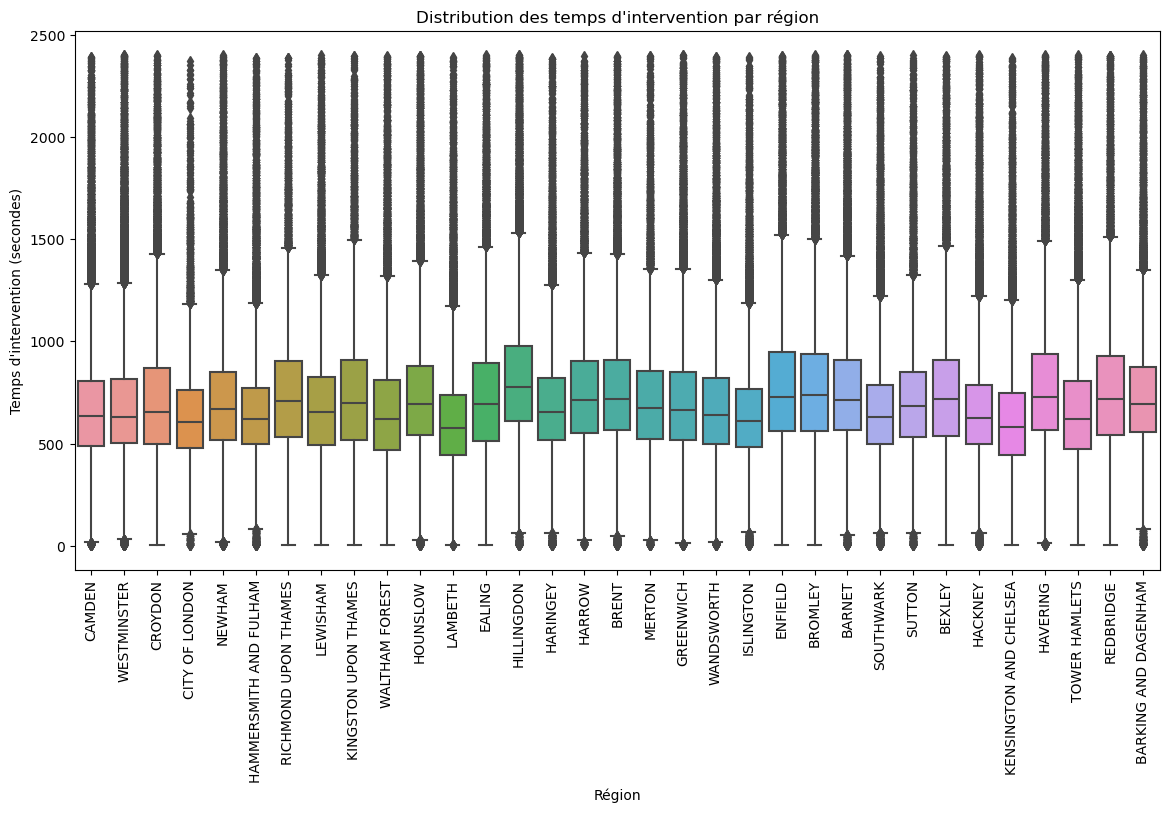

In [40]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x="IncGeo_BoroughName", y="TotalResponseTime")
plt.xticks(rotation=90)
plt.title("Distribution des temps d\'intervention par région")
plt.xlabel("Région")
plt.ylabel("Temps d\'intervention (secondes)")
plt.show()